<div align="center">
  <h1>Space Ship Titanic</h1>
</div>


In [1]:
import pandas as p

In [3]:
train = p.read_csv('SpaceshipTitanicTrain.csv')
test = p.read_csv('SpaceshipTitanicTest.csv')
passengerid = test["PassengerId"]

In [4]:
train.shape, test.shape 
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [7]:
train.drop(columns=['Name', 'PassengerId'], inplace=True)
test.drop(columns=['Name', 'PassengerId'], inplace=True)

In [8]:
train[['HomePlanet', 'CryoSleep', 'Destination', 'VIP']] = train[['HomePlanet', 'CryoSleep', 'Destination','VIP']].fillna(method='ffill')
test[['HomePlanet', 'CryoSleep', 'Destination', 'VIP']] = test[['HomePlanet', 'CryoSleep', 'Destination','VIP']].fillna(method='ffill')

In [9]:
train.isnull().sum()

HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [10]:
train[['CabinDeck', 'CabinNum', 'CabinSize']] = train['Cabin'].str.split('/', expand=True)
test[['CabinDeck', 'CabinNum', 'CabinSize']] = train['Cabin'].str.split('/', expand=True)

In [11]:
train.drop(columns=['Cabin', 'CabinNum'], inplace=True)
test.drop(columns=['Cabin', 'CabinNum'], inplace=True)

In [12]:
train['CabinDeck'] = train['CabinDeck'].fillna(method='ffill')
train['CabinSize'] = train['CabinSize'].fillna(method='ffill')
test['CabinDeck'] = test['CabinDeck'].fillna(method='ffill')
test['CabinSize'] = test['CabinSize'].fillna(method='ffill')

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

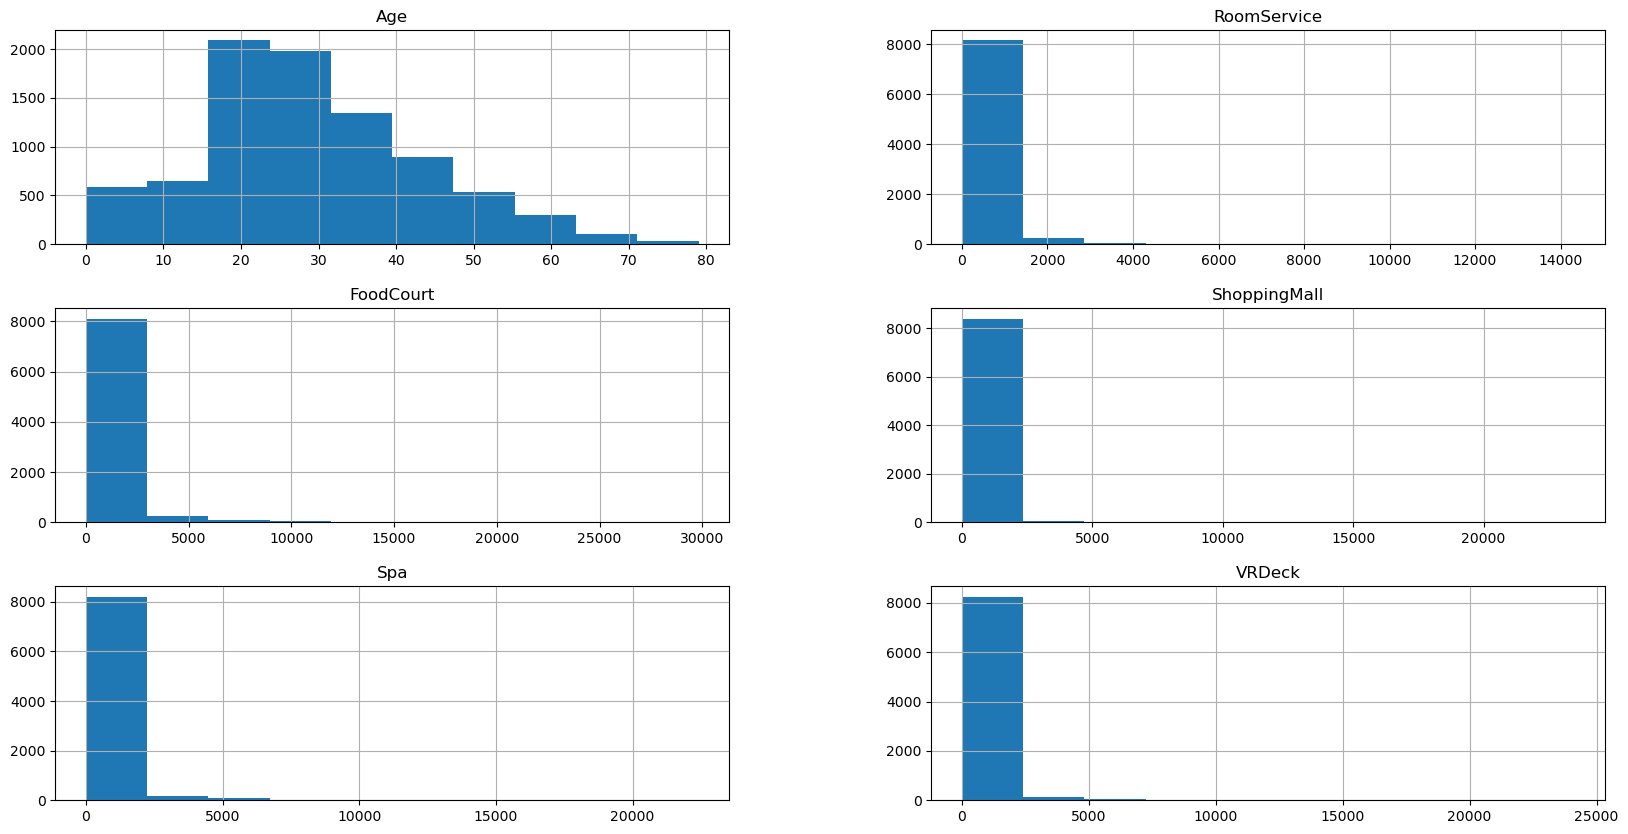

In [13]:
train.hist(figsize=(20, 10))

In [14]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())
train['RoomService'] = train['RoomService'].fillna(train['RoomService'].mode()[0])
test['RoomService'] = test['RoomService'].fillna(test['RoomService'].mode()[0])
train['FoodCourt'] = train['FoodCourt'].fillna(train['FoodCourt'].mode()[0])
test['FoodCourt'] = test['FoodCourt'].fillna(test['FoodCourt'].mode()[0])
train['ShoppingMall'] = train['ShoppingMall'].fillna(train['ShoppingMall'].mode()[0])
test['ShoppingMall'] = test['ShoppingMall'].fillna(test['ShoppingMall'].mode()[0])
train['Spa'] = train['Spa'].fillna(train['Spa'].mode()[0])
test['Spa'] = test['Spa'].fillna(test['Spa'].mode()[0])
train['VRDeck'] = train['VRDeck'].fillna(train['VRDeck'].mode()[0])
test['VRDeck'] = test['VRDeck'].fillna(test['VRDeck'].mode()[0])

In [15]:
train.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
CabinDeck       0
CabinSize       0
dtype: int64

In [16]:
test.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
CabinDeck       0
CabinSize       0
dtype: int64

In [17]:
train.dtypes

HomePlanet       object
CryoSleep          bool
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
CabinDeck        object
CabinSize        object
dtype: object

In [18]:
train[['CryoSleep', 'VIP', 'Transported']] = train[['CryoSleep', 'VIP',
'Transported']].astype(int)
test[['CryoSleep', 'VIP']] = test[['CryoSleep', 'VIP']].astype(int)

In [19]:
df = p.get_dummies(train, columns=['HomePlanet', 'Destination',
'CabinDeck', 'CabinSize'])
p.set_option('display.max_columns', 100)
df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSize_P,CabinSize_S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True


In [20]:
y = df['Transported'].copy()
X = df.drop(columns='Transported').copy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=786)

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_prediction = dtc.predict(X_test)


In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix
dtc_accuracy = accuracy_score(y_test, dtc_prediction)
dtc_accuracy # 0.7372052903967797
dtc_confusion_matrix = confusion_matrix(y_test, dtc_prediction)
dtc_confusion_matrix

array([[633, 231],
       [211, 664]])

In [23]:
#Random Forest Classifier - best model 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=786)
rfc.fit(X_train, y_train)
rfc_prediction = rfc.predict(X_test)
rfc_accuracy = accuracy_score(y_test, rfc_prediction)
rfc_accuracy # 0.7987349051178838
rfc_confusion_matrix = confusion_matrix(y_test, rfc_prediction)
rfc_confusion_matrix

array([[723, 141],
       [209, 666]])